<a href="https://colab.research.google.com/github/eday15/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Elijah_Day_Build_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import pandas as pd
import io
from sklearn.metrics import mean_absolute_error
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.inspection import plot_partial_dependence
from sklearn.tree import DecisionTreeClassifier
!pip install category_encoders==2.*
import category_encoders as ce

     |████████████████████████████████| 81kB 3.5MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns

In [3]:
#upload files on diabetis
from google.colab import files
uploaded = files.upload()
upload = io.StringIO(uploaded['diabetes.csv'].decode('utf-8'))
df = pd.read_csv(upload)

Saving diabetes.csv to diabetes.csv


In [4]:
# Represent missing values as NaN
df[['Insulin','Glucose','BloodPressure','SkinThickness','BMI']] = df[['Insulin','Glucose','BloodPressure','SkinThickness','BMI']].replace(0,np.NaN)

In [5]:
# Check Null Values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [6]:
# Drop Insulin due to excessive missing data
df.drop(columns='Insulin',inplace=True)

In [7]:
# Change outcome to yes & no
df['Outcome'] = df['Outcome'].replace(0,'no')
df['Outcome'] = df['Outcome'].replace(1,'yes')

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,yes
1,1,85.0,66.0,29.0,26.6,0.351,31,no
2,8,183.0,64.0,NaN,23.3,0.672,32,yes
3,1,89.0,66.0,23.0,28.1,0.167,21,no
4,0,137.0,40.0,35.0,43.1,2.288,33,yes


In [9]:
# The target is the outcome collumn
target = 'Outcome'
X = df.drop(columns=target)
y = df[target]

In [10]:
#baseline
baseline_acc = y.value_counts(normalize=True)[0]
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.6510416666666666


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


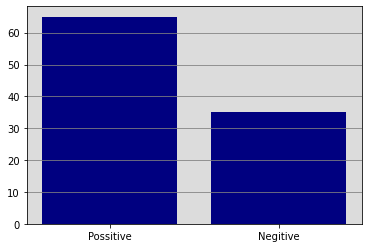

In [11]:
# Precentage of positive and negitive outcomes
plt.bar(['Possitive','Negitive'],(65,35),color = 'navy')
plt.grid(color = 'grey', linestyle = '-',axis='y')
plt.axes().set_facecolor('gainsboro')
plt.show()

In [12]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.5)

In [13]:
# Build Model 
#XGBoost
pipe = make_pipeline(ce.OrdinalEncoder(),SimpleImputer(strategy='median'),XGBClassifier(n_estimators=15,n_jobs=200))
model = pipe.fit(X_train,y_train)
# Random Forest
pipe2 = make_pipeline(ce.OrdinalEncoder(),SimpleImputer(strategy='median'),RandomForestClassifier(n_estimators=15,n_jobs=200))
model2 = pipe2.fit(X_train,y_train)

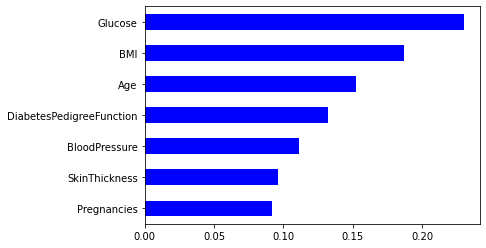

In [15]:
# Feature importance
rf = pipe2.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)
importances.sort_values().plot.barh(color='blue')

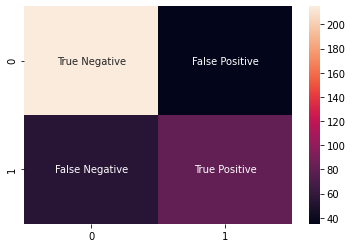

In [16]:
#confusion Matrix
pred = model2.predict(X_test)
confusion_matrix1 = confusion_matrix(y_test, pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix1,annot=labels,fmt='')

In [17]:
# Accuracy Score
# XGBoost
training_Score = pipe.score(X_train,y_train)
Testing_Score = pipe.score(X_test,y_test)
training_Score2 = pipe2.score(X_train,y_train)
Testing_Score2 = pipe2.score(X_test,y_test)
print(' XGBoost')
print('Training Accuracy Score',training_Score)
print('Testing Accuracy Score',Testing_Score)
print('\n','Random Forest')
print('Training Accuracy Score',training_Score2)
print('Testing Accuracy Score',Testing_Score2)

 XGBoost
Training Accuracy Score 0.8177083333333334
Testing Accuracy Score 0.7838541666666666

 Random Forest
Training Accuracy Score 0.9973958333333334
Testing Accuracy Score 0.7682291666666666
